# **Forelesning 3 - Matematikk, statistikk og bakgrunn for maskinlæring**

## Hvorfor?
For å forstå mange av de operasjonene vi skal gjøre trenger vi noe fundamental matematikk i bunn. Dette kommer vi bare til å skrape overflaten til, men likevel gi en introduksjon og intuisjon til hvorfor vi kan gjøre det vi kommer til å gjøre.

## **Fra sist gang**
Sist forelesning hadde vi om **TensorFlow**, og gikk videre til å diskutere arkitekturen i nevrale nettverk, dens komponenter og egenskaper. Vi diskuterte ulike loss-funksjoner, aktiveringsfunksjoner og gikk igjennom MNIST-datasett eksempel på bildeklassifisering.

Vi nevnte, at mye av maskinlæring handler egentlig om å minimere en *loss-funksjon*, noe som er sant - men i denne forelesningen skal vi se på *hvordan* vi minimerer disse loss-funksjonene.

Med andre ord, vi skal fokusere på hvordan nettverk *lærer* i maskinlæring, og da skal vi gå inn på hva optimiseringsalgoritmene som **SDG** og **Adam** gjør!

Sist gang så vi på matematisk notasjon av vekter, bias, nevron, aktiveringsfunksjon - og hvordan vi skriver når vi går fra ett lag til et annet.

$$a_{0}^{(1)}
= \sigma \left(w_{0,0} a_{0}^{(0)} + w_{0,1} a_{1}^{(0)} + \cdots + w_{0,n} a_{n}^{(0)} + b_{0} \right)$$
- $a_0^{(1)}$ - betyr første nevron i det første hidden-layer.
- $a_0^{(0)}$ - betyr første nevron i input laget.
- vektene er fra **alle** nevronene i input laget til første hidden layer, med en bias.

og at **hele nettverket** egentlig kan sees på som en funksjon:
$$f(a_0, a_1, \cdots, a_{783}) = \mathbf{y} = \begin{pmatrix}
y_0 \\
y_1 \\
\vdots \\
y_9
\end{pmatrix}$$
hvor målet er å finne *riktig* verdi av disse *vektene* og *biasene* slik at funksjonen "oppfører" seg slik vi ønsker.

![https://3b1b-posts.us-east-1.linodeobjects.com/content/lessons/2017/neural-networks/neural-network-function.png](https://3b1b-posts.us-east-1.linodeobjects.com/content/lessons/2017/neural-networks/neural-network-function.png)
Bilde: https://www.3blue1brown.com/lessons/gradient-descent

## Så hvordan *lærer* nettverket???
Et nevralt nettverk må ha et *starting point*, og intieres med å tilfeldig velge vekter og bias'er. Noe som (selvsagt) fører til dårlige prediksjoner og merkelig oppførsel. For å fikse på denne oppførselen må vi innføre en *straff*, og det gjør vi gjennom en **kost-funksjon**!

## Kost funksjon
Fra sist gang, så diskuterte vi loss-funksjon. F.eks. har vi diskutert
$$MSE = \frac{1}{n} \Sigma_{i=1}^n (\hat{y}_i - y_i)^2$$
og denne brukes for å evaluere hvor godt modellen vår gjør det, altså hvor bra den er. Ved tilfeldig gjetning, så vil vi da få en høy MSE - og vi ønsker å minimere denne. Det gjøres gjennom **optimaliseringsalgoritmer**, som vi skal se på nå.

<div align="center">
  <img src="https://3b1b-posts.us-east-1.linodeobjects.com/content/lessons/2017/gradient-descent/recap-propagation.png" alt="Recap Propagation" width="45%" />
  <img src="https://3b1b-posts.us-east-1.linodeobjects.com/content/lessons/2017/gradient-descent/cost-calculation.png" alt="Cost Calculation" width="45%" />
</div>

**Bilde: [3Blue1Brown](https://www.3blue1brown.com/lessons/gradient-descent)**

## **Først litt matematikk - Derivasjon og gradienter**
Kalkulus, er en annen grunnstein av maskinlæring, og som dere kjenner til gjennom økonometri. Økonomer trenger differentiell kalkulus for å estimere modeller, finne optimum og løse modeller som baserer seg på differential-likninger (for å nevne noen). I maskinlæring, det vi bruker mest tid på i kurset, brukes kalkulus for å trene modellene i f.eks. nevrale nettverk.

Derivasjon handler om hvor mye en variabel, kall denne $Y$, endres i respons til en endring i en annen variabel, $X$. Hvis forholdet mellom $X$ og $Y$ er lineært, er den deriverte av $Y$ med hensyn til $X$ en rett linje. Det betyr at den deriverte til
$$Y = f(X)$$
kan regnes ut den deriverte med hensyn på $X$ på følgende vis
$$f'(X) = \frac{d}{dX}f(X)=\frac{ΔY}{ΔX}$$


<ipython-input-1-3f3fca43fb19>:29: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro-" (-> color='r'). The keyword argument will take precedence.
  plt.plot([x1, x2], [y1, y2], 'ro-', label='$\Delta Y / \Delta X$', color='orange')


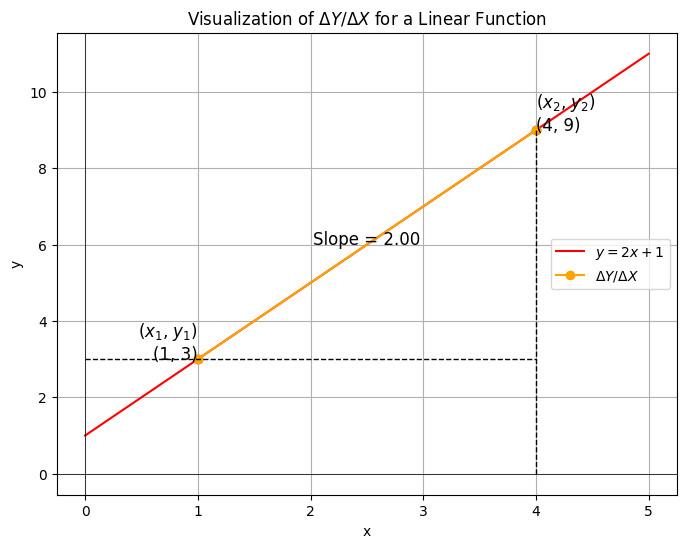

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Lineær funksjon y = 2x + 1
def f(x):
    return 2*x + 1

# Punkt for sekant-linja
x1 = 1
x2 = 4

# Regn ut y-verdier for x1, x2
y1 = f(x1)
y2 = f(x2)

# Regn ut stigningstallet (delta Y / delta X)
delta_x = x2 - x1
delta_y = y2 - y1
slope = delta_y / delta_x

# Plotter funksjonen fra 0<x<5, og tilhørende f(x) verdier
x = np.linspace(0, 5, 100)
y = f(x)

plt.figure(figsize=(8, 6))
plt.plot(x, y, label='$y = 2x + 1$', color='r')

# Plotter sekant linja
plt.plot([x1, x2], [y1, y2], 'ro-', label='$\Delta Y / \Delta X$', color='orange')
plt.text((x1 + x2) / 2, (y1 + y2) / 2, f'Slope = {slope:.2f}', fontsize=12, ha='center')

# Markerer punktene x1 og x2 på kurven
plt.scatter([x1, x2], [y1, y2], color='red')
plt.text(x1, y1, f'($x_1$, $y_1$)\n({x1}, {y1})', fontsize=12, ha='right')
plt.text(x2, y2, f'($x_2$, $y_2$)\n({x2}, {y2})', fontsize=12, ha='left')

# Legger til dotted lines
plt.plot([x2, x2], [0, y2], 'k--', linewidth=1)  # Vertikal dotted line fra x2 til y2
plt.plot([0, x2], [y1, y1], 'k--', linewidth=1)  # Horisontal dotted line fra y1 til x1

# Legger til labels og title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Visualization of $\Delta Y / \Delta X$ for a Linear Function')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(True)
plt.legend()

# Viser selve plottet
plt.show()

dog så vil vi ofte i matematikken, statistikken og økonomien støte på *ikke-lineære* funksjoner og da trenger vi en annen definsjon av den deriverte, nemlig
$$f'(x) = \lim_{h \to 0} \frac{f(x+h) - f(x)}{h}
$$


### Lokale minimum og maksimum
Vi kan finne ekstremalpunkter av en funksjon $f(x)$ ved å
$$\frac{df}{dx}(x)=0$$

Så når vi snakker om **kost funksjon**, la oss notere den som $C(w)$. Da kan vi regne ut
$$\frac{dC}{dw}(w)=0$$
men det lar seg ikke alltid gjøre, særlig ikke for svært kompliserte funksjoner.

<div align="center">
  <img src="https://3b1b-posts.us-east-1.linodeobjects.com/content/lessons/2017/gradient-descent/infeasible-minimum.png" alt="Infeasible Minimum" width="45%" />
  <img src="https://3b1b-posts.us-east-1.linodeobjects.com/content/lessons/2017/gradient-descent/follow-slope.png" alt="Follow the Slope" width="45%" />
</div>

**Bilde: [3Blue1Brown](https://www.3blue1brown.com/lessons/gradient-descent)**


# **Gradient decent**
Hvis vi se på en litt mer komplisert funksjon i tre dimensjoner ($x$, $y$ og $z$), da kan vi skrive kost-funksjonen som
$$C(x, y)$$

Da ønsker vi å finne retningen for denne funksjonen minker fortest. Fra flervariabel kalkulus, kan vi finne *gradienten* en funksjon, skrevet som $∇C(x, y)$.

Vi skal ikke gå i superdetalj i hva gradienten er, men litt utdypet skrives det slik:
$$\nabla C(x, y)=\left(\frac{\partial C}{\partial x}, \frac{\partial C}{\partial y}\right)$$

Når denne funksjonen gir oss en *vektor* med retning hvor det er **brattest stigning**, så kan vi "bare" gå i **motsatt retning**! Ettersom vi ønsker å gå i retningen funksjonen minker mest!

### Gradient decent gjør altså:
1. *Gradient decent* er en teknikk for å minimere en loss/kost-funksjon $C$ som iterativt oppdaterer $\vec{\mathbf{W}}$ (en vektor av alle vekter/bias'ene).
2. Regner ut $-\nabla C\left(\vec{\mathbf{W}} \right)$, og oppdaterer $\vec{\mathbf{W}}$.
Kan skrives:
$$\vec{\mathbf{W}} := \vec{\mathbf{W}} - \eta \cdot \nabla C\left(\vec{\mathbf{W}}\right)$$
hvor $\eta$ er *læringsraten* (eng: learning rate - og kan spesifiseres i koden), og kan sees på som å ta en lite steg i retningen hvor det minker mest.
3. Gjenta steg 2 flere ganger (til konvergens eller gitt antall steg)

(Learning rate - kan hindre *overshooting*, men også senke konvergens.)

[Se denne om du vil vite mer om gradienter!](https://www.youtube.com/watch?v=IHZwWFHWa-w&list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi&index=2)

Vi nevnte innledningsvis at vi skal diskutere optimaliseringsalgoritmer, som **SDG** (Stochastic Gradient Decent) og det er "bare" et spesialtilfelle av **gradient decent** (som forklart over).

Stochastic Gradient Descent (SGD) er en spesialtilfelle av gradient descent fordi den oppdaterer vektene basert på et tilfeldig treningseksempel av dataene (eller en minibatch), i stedet for hele datasettet. Dette har flere fordeler:

1. **Raskere oppdateringer**: I stedet for å vente på at hele datasettet skal prosesseres før vektene oppdateres, gjør SGD oppdateringer etter hver minibatch. Dette gjør læringsprosessen raskere og mer effektiv.

2. **Unngå lokal minima**: Fordi SGD introduserer en viss grad av støy ved å bruke tilfeldig utvalg, kan det hjelpe til med å unngå å bli stuck i lokale minima. Den støyende oppdateringen kan gjøre at algoritmen "hopper" ut av dårlige løsninger og fortsetter å søke etter bedre løsninger.

3. **Bedre generalisering**: Den tilfeldige naturen i SGD kan også føre til bedre generalisering til ukjente data, siden den kan unngå overtilpasning ved å ikke alltid følge den presise gradienten av kostfunksjonen.

4. **Fleksibilitet med læringsrate**: SGD gir mulighet for å implementere læringsrate-planer, der læringsraten kan justeres i løpet av treningen for å forbedre konvergensen ytterligere.

Sammen med disse fordelene gjør SGD det til et populært valg i trening av nevrale nettverk, spesielt når man arbeider med store datasett der det ville vært ineffektivt å bruke hele datasettet for hver oppdatering.

Dette er en del av forståelsen som kreves for hva det vil si at nevrale nettverket "lærer". Kult?

---

## Hvorfor har vi brukt ADAM og ikke SDG som optimizer?

Adam (Adaptive Moment Estimation) er en populær optimaliseringsalgoritme innen maskinlæring og dyp læring, og det har noen betydelige fordeler sammenlignet med Stochastic Gradient Descent (SGD):

1. **Adaptive læringsrater**: Adam beregner individuelle læringsrater for hver parameter basert på første og andre moment av gradientene. Dette gjør at Adam automatisk kan tilpasse læringsraten under trening, noe som ofte resulterer i raskere konvergens.

2. **Robusthet mot støy**: Adam er designet for å håndtere støy i gradientene. Den tilpasser seg dynamisk basert på den gjennomsnittlige gradienten, noe som gjør den mer robust i situasjoner med varierende datakvalitet og -distribusjoner.

3. **Raskere konvergens**: På grunn av dens adaptive natur, konvergerer Adam ofte raskere enn SGD, spesielt i problemer med mange parametere eller komplekse datasett. Dette gjør Adam til et attraktivt valg for dyplæringsoppgaver.

4. **Bedre ytelse i praksis**: Mange empiriske studier har vist at Adam ofte presterer bedre enn SGD på en rekke oppgaver og datasett. Det kan være spesielt nyttig i situasjoner der det er vanskelig å velge en passende læringsrate for SGD.

5. **Mindre behov for hyperparameterjustering**: Adam reduserer behovet for finjustering av læringsratene og andre hyperparametere, noe som kan spare tid og ressurser under utviklingsprosessen.

6. **Fleksibilitet**: Adam fungerer godt med forskjellige typer nevrale nettverk og er vanligvis en standardvalg i mange dype læringsbiblioteker, noe som har ført til utbredt bruk i forsknings- og industriapplikasjoner.

Disse egenskapene har gjort Adam til en favoritt blant forskere og praktikere innen maskinlæring, og det er ofte det første valget for optimalisering når man arbeider med nevrale nettverk.


## **Backpropagation**
Nå har vi snakket om nevrale nettverk, deres struktur, input, loss-/kostnadsfunksjon og hvordan vi minimerer kostnadsfunksjonen for å finne vektene og biasene slik at nettverket kan "lære".

Vi har snakket om at data *strømmer* fra *input* laget, gjennom *hidden layers* og til *output* laget, og kalles for *feedforward* nevrale nettverk. Likevel, i treningsprosessen, er **backpropagation** essensiell for nettverket's evne til å "lære".

### Hva er backpropagation?
Kort fortalt, så er det en algoritme for å beregne den veldig kompliserte gradienten
$$- \nabla C\left(\vec{\mathbf{W}} \right)$$

Vi diskuterte at gradienten finner retningen til **bratteste** stigning, men hvor vi ønsker å minimere (derfor $-$ tegnet før gradienten).

Det er vanskelig å se for seg retningen til $\nabla C\left(\vec{\mathbf{W}}\right)$, når $\vec{\mathbf{W}}$ har flere tusen vekter og bias'er. Derfor kan vi tenke på det som hvis vi har
$$- \nabla C\left(\vec{\mathbf{W}} \right) = \begin{pmatrix}
\vdots \\
\color{red}{2.40} \\
\vdots \\
\color{green}{0.20}\\
\vdots
\end{pmatrix}$$
det betyr at den vekten assosiert med $2.40$ har $12$ ganger så høy påvirkningskraft til kostfunksjonen, sammenlignet med vekten assosiert med $0.20$.

**Sagt på en annen måte:**
Gradienten viser hvor sensitiv kostfunksjonen er for små endringer i vektene. Hvis en gradientverdi er $12$ ganger større enn en annen, betyr det at kostfunksjonen endres $12$ ganger raskere med hensyn til den vekten, men dette avhenger av den spesifikke kostfunksjonen som brukes.

**Verdt å merke seg:**
Backpropagation er en metode for å beregne gradientene for parameterne i nettverket. Den er uavhengig av hvilken optimaliseringsalgoritme (SDG, ADAM) som brukes til å oppdatere vektene, men gradientene den beregner, avhenger av den spesifikke kostfunksjonen (MSE, Cross-Entropy Loss, etc.).

Backpropagation, jobber seg bakover fra output laget til å finne de ideelle vekter og bias'ene mellom de ulike lagene, med mål om best mulige prediksjoner.

I teorien gjøres dette for all treningsdata, men det tar laaaang tid. Derfor deler man opp treningsdata'en (tilfeldig) i mindre *batcher*, og vi kan regne ut gradienten fortere (dette er konseptet til Stochastic gradient decent).

---

## **Regularisering**
Når vi utvikler maskinlæringsmodeller, kan vi oppleve at treningsnøyaktigheten til modellen er høy, men valideringsnøyaktigheten eller testnøyaktigheten er lav. Dette er en situasjon som populært kalles overfitting innen maskinlæring. Som diskutert tidligere i kurset, det ønsker vi **ikke** at modellene våre gjør!

### Dropout
Dropout er en (av flere!) måte å regularisere modellene våre på. Det er en regulariseringsteknikk som innebærer å tilfeldig ignorere eller "droppe ut" noen av output'ene i et lag under trening, og brukes i dype nevrale nettverk for å forhindre overfitting.

Dropout implementeres per lag i ulike typer lag som tette fullt tilkoblede lag, konvolusjonslag og rekursive lag, unntatt utgangslaget. Dropout-sannsynligheten spesifiserer sjansen for å droppe ut output's, med forskjellige sannsynligheter for inngangs- og skjulte lag, som forhindrer at en enkelt nevron blir for spesialisert eller overdrevent avhengig av tilstedeværelsen av spesifikke trekk i treningsdataene.

### Early stopping
Early stopping er en teknikk som brukes i maskinlæring for å forhindre overfitting av modeller. Metoden innebærer å overvåke ytelsen til modellen på et valideringssett under trening, og å stoppe treningen når ytelsen begynner å bli dårligere, selv om treningsfeilen fortsatt reduseres. Dette skjer vanligvis ved å følge disse trinnene:

1. Monitorering av valideringsytelse: Under treningen evalueres modellen på et valideringssett etter hver epoke (eng: *epoch*) for å se hvordan den presterer på data den ikke har sett før.

2. Definere en tidlig stoppkriterium: Hvis valideringsytelsen (for eksempel nøyaktighet/accuracy eller tap/loss) ikke forbedres over et definert antall påfølgende epoker (kalt "patience"), avsluttes treningen. Dette forhindrer at modellen fortsetter å lære og blir mer tilpasset treningsdataene, noe som kan føre til overfitting.

3. Lagring av beste modell: Når tidlig stopp inntreffer, lagres den modellen med best valideringsytelse, slik at man kan bruke den mest generaliserte versjonen av modellen til fremtidige prediksjoner.

Ved å bruke early stopping kan man oppnå en god balanse mellom modellens kompleksitet og ytelse, og dermed forbedre generaliseringsevnen.

### Andre teknikker
L1 regularisering, L2 regularisering og batch-normalisering er andre teknikker som kan hjelpe oss å forhindre overfitting. Men vi går ikke gjennom disse i kurset, men kan være interessant å bli kjent med i forbindelse med prosjektarbeidet.

---

##**Tuning av hyperparametre**
Tuning av hyperparametere innebærer justering av innstillinger som læringsrate, antall lag og nevroner før treningen av en maskinlæringsmodell. Dette er viktig for å optimalisere modellens ytelse og generalisering.

##**Feature engineering**
Feature engineering er prosessen med å lage, transformere eller velge funksjoner (features) fra rådata for å forbedre ytelsen til maskinlæringsmodeller. Det involverer aktiviteter som:

- Transformasjon: Endre skalaen eller formatet på dataene (f.eks. normalisering eller standardisering).
- Kombinasjon: Lage nye funksjoner ved å kombinere eksisterende variabler (f.eks. summere eller multiplisere variabler).
- Utvelgelse: Velge de mest relevante funksjonene for å redusere kompleksiteten i modellen og forhindre overfitting.

Effektiv feature engineering kan føre til bedre modellprestasjoner og mer nøyaktige prediksjoner.

---

# **Fra forrige gang**
Her ser vi på koden fra sist forelesning, men med litt justeringer. Vil det føre til enda bedre prediksjoner?

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import numpy as np

# Sist gang, så lasta vi inn MNIST datasett.
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normaliserer pixelverdiene til [0, 1]

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Splitter training data opp til training og validation sets
# Dette gir oss muligheten til å overvåke modellens ytelse på et sett som ikke ble brukt til trening. Før vi til slutt, tester det på x_test og y_test
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [8]:
# Definerer en sekvensiell modell ved hjelp av TensorFlow's Keras API.
model = Sequential([
    tf.keras.Input(shape=(28, 28)),                   # Input lag - bilde som er 28 x 28 piksler
    Flatten(),                                        # "Flate ut" laget fra en 2D array (28, 28) til en vektor (784, )
    Dropout(0.25),                                    # Dropout-lag som tilfeldigvis "dropper ut" 25% av nevronene for å forhindre overfitting.
    Dense(128, activation='relu'),                    # Dense-lag med 128 nevroner og ReLU aktivering.
    Dropout(0.25),                                    # Ytterligere Dropout for å redusere overfitting ytterligere.
    Dense(10, activation = 'softmax')                 # Fully-connecta lag til output (0-9, altså 10 ulike klasser) vha softmax
])

In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
predictions = model(x_train[:1]).numpy()
predictions

array([[0.11418618, 0.08540364, 0.07722898, 0.12946802, 0.1605158 ,
        0.13186507, 0.09316692, 0.03779643, 0.09749361, 0.07287533]],
      dtype=float32)

In [10]:
# Har vi tatt 'softmax' som aktiveringsfunksjon i slutten av nettverket - skal summen her være lik 1.
np.sum(predictions)

1.0

In [ ]:
#tf.nn.softmax(predictions).numpy()

In [11]:
# Definerer tap-funksjonen, ingen logit's pga softmax er tatt lenger oppe i nevrale nettverk strukturen.
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)

In [12]:
# Kompilerer modellen med spesifiserte innstillinger
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [13]:
# Setter opp tidlig stopp for å hindre overfitting.
# monitor='val_loss' betyr at vi stopper basert på forbedring i valideringstapet.
# patience=3 betyr at modellen kan vente 3 epochs uten forbedring før treningen stopper.
# restore_best_weights=True betyr at modellen automatisk vil gå tilbake til de beste vektene som ble oppnådd under treningen.
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [15]:
# Trener modellen med valideringsdata og tidlig stopp
history = model.fit(x_train, y_train,
                    epochs=20,
                    validation_data=(x_val, y_val),   # Valideringssett for å overvåke ytelse under trening.
                    callbacks=[early_stopping])       # Bruker tidlig stopp.

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7999 - loss: 0.6506 - val_accuracy: 0.9494 - val_loss: 0.1766
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9317 - loss: 0.2317 - val_accuracy: 0.9624 - val_loss: 0.1303
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9448 - loss: 0.1793 - val_accuracy: 0.9687 - val_loss: 0.1086
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9538 - loss: 0.1483 - val_accuracy: 0.9712 - val_loss: 0.0960
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9576 - loss: 0.1355 - val_accuracy: 0.9737 - val_loss: 0.0873
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9614 - loss: 0.1241 - val_accuracy: 0.9740 - val_loss: 0.0891
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9622 - loss: 0.1205 - val_accuracy: 0.9763 - val_loss: 0.0830
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9649 - loss: 0.1124 - 

In [16]:
# Evaluering av modellen på testsettet
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f'Test loss: {test_loss}, Test accuracy: {test_accuracy}')

313/313 - 1s - 4ms/step - accuracy: 0.9771 - loss: 0.0738
Test loss: 0.07378825545310974, Test accuracy: 0.9771000146865845


## Så her ender vi opp med en accuracy på rundt $98$%!

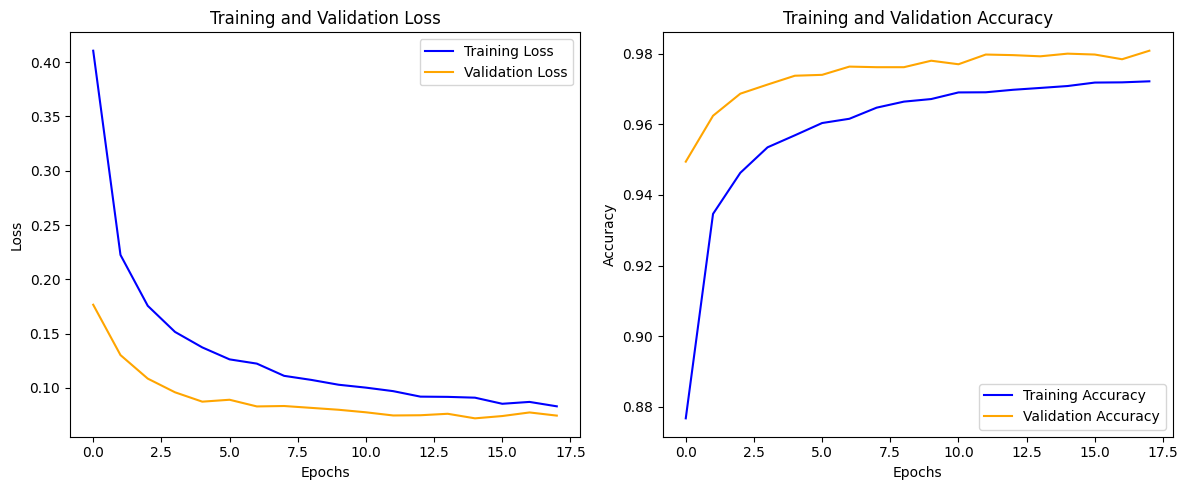

In [17]:
# Plotter trenings og validerings loss/tap
plt.figure(figsize=(12, 5))

# Plotter Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotter Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

---

---

---

# Oppgaver

## Oppgave 1
Gå igjennom "Kode eksempel - Convolutional Neural Networks" (lenger ned i dokumentet), og der vil dere se at vi får en **enda høyere** test accuracy.

Prøv å forstå koden under, en god øvelse på å se hva dere har forstått.

## Oppgave 2
I forelesning 1 så vi på datasettet ```Fraud.csv``` - last inn denne filen i Google Colab, og prøv å lag et nevralt nettverk som predikerer om ```isFraud``` er lik $0$ eller $1$.

Hint da bør du sjekke ut:
```python
  # Loss funksjon
  loss_fn = tf.keras.losses.BinaryCrossentropy(from_logits=False)

  # Eks. på output-lag, med en aktiveringsfunksjon
  model.add(tf.keras.layers.Dense(1, activation='sigmoid'))  
```

---

# **Kode eksempel - Convolutional Neural Networks**
Her er et kode-eksempel som bruker et spesielt type nettverk, CNN, dette vil vi ser mer på i forelesning 5.

In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [19]:
# Laster inn MNIST-datasettet (håndskrevne siffer).
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normaliserer bildene til verdier i området [0, 1] ved å dele på 255.
# Dette gjør at pikselverdiene, som opprinnelig er i området [0, 255], skaleres til flyttall mellom 0 og 1.
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [20]:
# Laster inn MNIST-datasettet (håndskrevne siffer).
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normaliserer bildene til verdier i området [0, 1] ved å dele på 255.
# Dette gjør at pikselverdiene, som opprinnelig er i området [0, 255], skaleres til flyttall mellom 0 og 1.
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Endrer formen på bildene fra (num_samples, 28, 28) til (num_samples, 28, 28, 1).
# Den ekstra dimensjonen (1) representerer antall kanaler (her gråskala), hadde den vært satt til (3) har vi fargebilder
# da de har tre fargekanaler RGB (Rød, Grønn, Blå).
x_train = x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))

#Obs: Den første "-1" i reshape() lar NumPy automatisk beregne antall eksempler (num_samples).


# One-hot encoder etikettene (klassene) slik at hver etikett blir representert som en vektor med 10 elementer.
# Eksempel: Hvis en etikett er 3, blir den representert som [0, 0, 0, 1, 0, 0, 0, 0, 0, 0].
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

Når du setter den første dimensjonen til `-1`, vil `reshape()`-funksjonen fra NumPy automatisk finne ut hvor mange bilder det er, basert på størrelsen på resten av dimensjonene $(28, 28, 1)$. På denne måten slipper du å manuelt spesifisere antall bilder `num_samples()` (Men, her vet vi at det er 60.000 bilder i treningsdataene - fra MNIST).

In [21]:
# Importere nødvendige biblioteker fra TensorFlow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

# Lager en sekvensiell modell
model = Sequential([
    # Første konvolusjonslag
    # Bruker 32 filtre av størrelse (3, 3), aktivert med ReLU, og forventer en inputform av (28, 28, 1) - altså våre gråskalabilder.
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),

    # Maksimal pooling-lag som reduserer dimensjonaliteten til funksjonskartene.
    # Bruker en pooling størrelse på (2, 2), noe som halverer både bredde og høyde.
    tf.keras.layers.MaxPooling2D((2, 2)),

    # Dropout-lag for å forhindre overfitting ved tilfeldig å sette 25% av nevronene til null under trening.
    Dropout(0.25),

    # Andre konvolusjonslag med 64 filtre, fortsatt med ReLU-aktivering.
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),

    # Ny maksimal pooling-lag for ytterligere dimensjonsreduksjon.
    tf.keras.layers.MaxPooling2D((2, 2)),

    # Ytterligere dropout-lag for å forhindre overfitting, denne gangen med 25%.
    Dropout(0.25),

    # Flatten-lag som konverterer de 2D-funksjonskartene til 1D-vektorer.
    tf.keras.layers.Flatten(),

    # Første Dense-lag med 128 nevroner og ReLU-aktivering, som fullstendig kobler til forrige lag.
    Dense(128, activation='relu'),

    # Dropout-lag for å hindre overfitting i dette laget også, nå med 50%.
    Dropout(0.5),

    # Utgangslag med 10 nevroner som representerer de 10 klassene, aktivert med softmax for å få sannsynligheter.
    Dense(10, activation='softmax')
])

# Modellstrukturen er nå definert. Den kan kompileres og trenes på datasett etterpå.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [23]:
history = model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8443 - loss: 0.4747
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9686 - loss: 0.1042
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9765 - loss: 0.0796
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9795 - loss: 0.0653
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9826 - loss: 0.0575
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9849 - loss: 0.0490
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9851 - loss: 0.0477
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9856 - loss: 0.0457
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9865 - loss: 0.0402
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9885 - loss: 0.0372


In [24]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_accuracy}: Test loss: {test_loss}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9898 - loss: 0.0273
Test accuracy: 0.9922999739646912: Test loss: 0.021838104352355003


## Her ser vi at vi har fått en test accuracy på over $99$%!
Her har vi brukt en annen form for nevrale nettverk, kalt *Convolutional Neural Networks* - som vi vil se mer på i forelesning 5!

-----